In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv('../data/preprocessed/df_train_preprocessed.csv')
df_test = pd.read_csv('../data/preprocessed/df_test_preprocessed.csv')

In [3]:
df_train.head()

,Engine_soacking_time,Long_Term_Fuel_Trim_Bank1,Engine_coolant_temperature.1,Torque_of_friction,Activation_of_Air_compressor,Intake_air_pressure,Accelerator_Pedal_value,Master_cylinder_pressure,Vehicle_speed,Engine_coolant_temperature,...,Engine_coolant_temperature_std,Maximum_indicated_engine_torque_std,Throttle_position_signal_std,Current_Gear_std,Calculated_LOAD_value_std,Engine_torque_after_correction_std,Engine_torque_std,Time(s),PathOrder,Class
0,129.0,0.0,61.0,20.50,1.0,49.5,1.00,1.00,16.5,62.0,...,0.447845,4.325598,1.904382,2.808080,10.501307,7.898869,7.977537,60,1,A
1,129.0,0.0,61.0,19.95,0.5,46.5,0.40,1.45,16.0,62.0,...,0.436586,4.343873,1.899675,2.741847,10.601330,7.749184,7.752906,61,1,A
2,129.0,0.0,61.0,17.20,0.5,45.5,1.95,1.00,15.0,62.0,...,0.424863,4.346977,1.878773,2.673314,10.445499,7.352123,7.354714,62,1,A
3,129.0,-0.4,61.0,16.40,0.5,56.0,8.40,1.00,14.5,62.5,...,0.424863,4.376167,1.868210,2.602300,9.965192,6.893510,6.893114,63,1,A
4,129.0,-0.4,61.0,16.20,0.5,67.0,10.75,1.15,14.5,62.5,...,0.424863,4.437932,3.536522,2.528594,9.472154,6.469108,6.466134,64,1,A


In [30]:
X_train = df_train.drop(columns=['Class']).values
y_train = df_train['Class'].values
X_test = df_test.drop(columns=['Class']).values
y_test = df_test['Class'].values

In [31]:
exclude_column = 'PathOrder'
feature_columns = [col for col in df_train.columns if col not in ['Class', exclude_column]]

In [32]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_columns),
        ('passthrough', 'passthrough', [exclude_column])
    ],
    remainder='passthrough'
)

In [33]:
X_train = preprocessor.fit_transform(df_train.drop(columns=['Class']))
X_test = preprocessor.transform(df_test.drop(columns=['Class']))

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [10]:
unique_values = np.unique(y_test)

print("Unique values in y_test:", unique_values)

Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


In [11]:
unique_classes = np.unique(y_train)

print("Unique values in y_train:", unique_values)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]


In [54]:
# Dictionary to hold models and results
from sklearn.metrics import f1_score , accuracy_score
from sklearn.svm import OneClassSVM

models = {}
results = {}

for cls in unique_classes:
    y_train_cls = np.where(y_train == cls, 1, -1)
    y_test_cls = np.where(y_test == cls, 1, -1)
    
    model = OneClassSVM(kernel='rbf',degree=10).fit(X_train[y_train_cls == 1])
    models[cls] = model
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    f1_score_test = f1_score(y_test_cls, y_pred_test)
    f1_score_train = f1_score(y_train_cls, y_pred_train)
    
    report = {
        'test_accuracy': accuracy_score(y_test_cls, y_pred_test),
        'train_accuracy': accuracy_score(y_train_cls, y_pred_train),
        'test_f1_score': f1_score_test,
        'train_f1_score': f1_score_train,
        
    }
    results[cls] = report
    
    print(f"Class {cls} classification report:\n", report)
for cls, report in results.items():
    print(f"Class {cls} classification report:\n", report)

Class 0 classification report:
 {'test_accuracy': 0.9507224898110411, 'train_accuracy': 0.9509183645029126, 'test_f1_score': 0.5397923875432526, 'train_f1_score': 0.6164234371596602}
Class 1 classification report:
 {'test_accuracy': 0.9203408669877733, 'train_accuracy': 0.9259455391733326, 'test_f1_score': 0.34782608695652173, 'train_f1_score': 0.5764387055635262}
Class 2 classification report:
 {'test_accuracy': 0.8988514264542423, 'train_accuracy': 0.7231806906547005, 'test_f1_score': 0.43478260869565216, 'train_f1_score': 0.22983870967741934}
Class 3 classification report:
 {'test_accuracy': 0.8831666049154008, 'train_accuracy': 0.9105604949970735, 'test_f1_score': 0.012526096033402922, 'train_f1_score': 0.5403237358544621}
Class 4 classification report:
 {'test_accuracy': 0.8956403606273928, 'train_accuracy': 0.9244962234175981, 'test_f1_score': 0.02085747392815759, 'train_f1_score': 0.5813630041724618}
Class 5 classification report:
 {'test_accuracy': 0.8377176732123008, 'train_ac

In [48]:
def test_models(models, X_test, y_test):
    y_pred = np.zeros((X_test.shape[0], len(models)))
    for i, (cls, model) in enumerate(models.items()):
        y_pred[:, i] = model.decision_function(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [51]:
test_pred = test_models(models, X_test, y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51       620
           1       0.89      0.58      0.70       817
           2       0.00      0.00      0.00       654
           3       0.64      0.35      0.45       856
           4       1.00      0.43      0.60       854
           5       0.34      0.88      0.49      1040
           6       0.00      0.00      0.00       650
           7       0.36      0.70      0.48       961
           8       0.23      0.15      0.18       739
           9       0.53      0.73      0.62       906

    accuracy                           0.46      8097
   macro avg       0.50      0.42      0.40      8097
weighted avg       0.51      0.46      0.43      8097



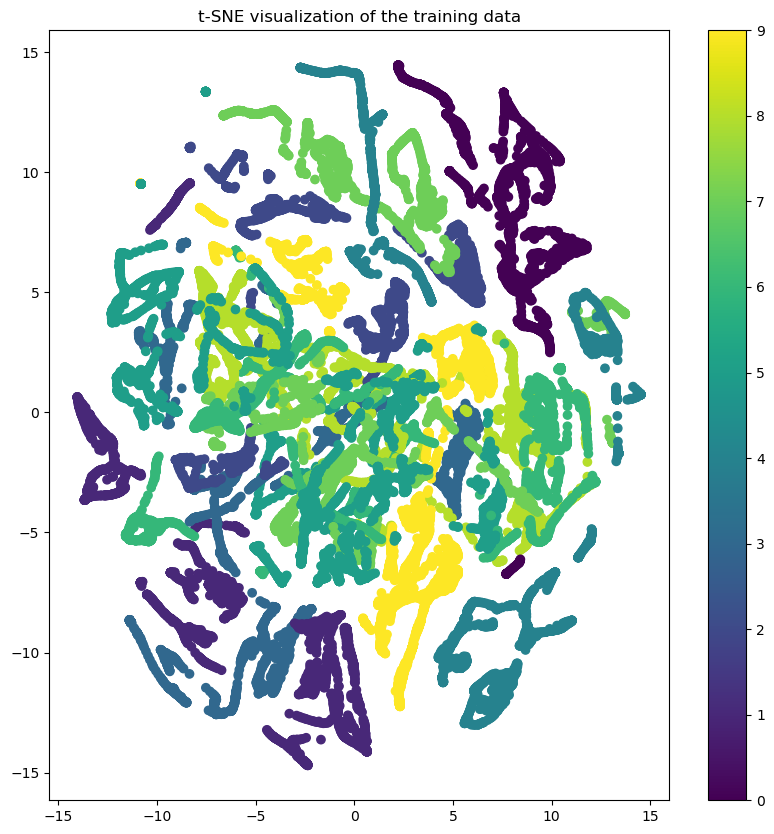

In [16]:
#import tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=55 , n_iter=300)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.colorbar()
plt.title("t-SNE visualization of the training data")
plt.show()

c:\Users\ibrahim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


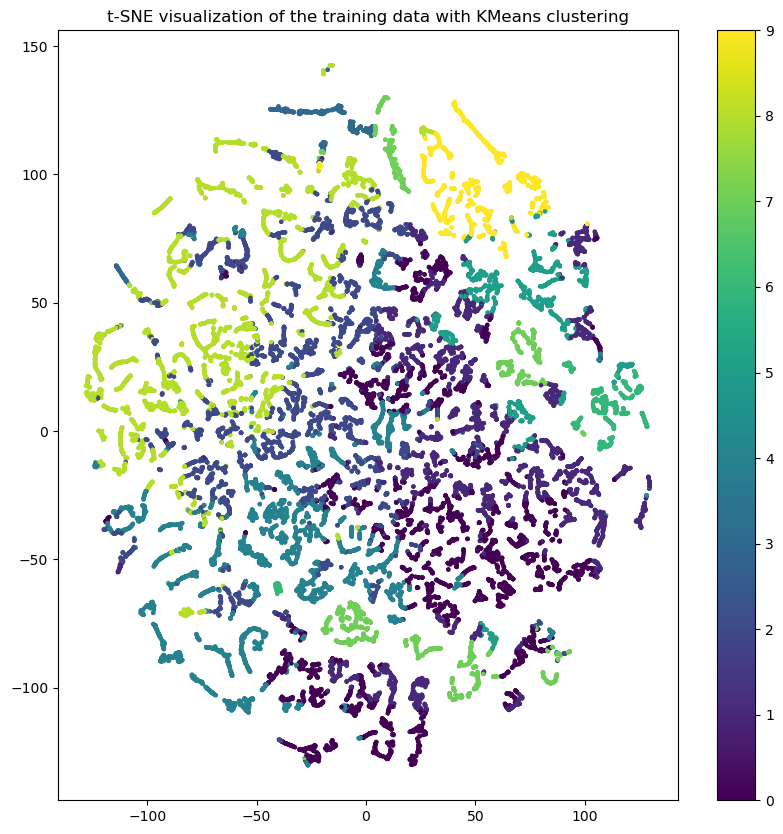

In [15]:
# import kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(unique_classes), random_state=42)
y_kmeans = kmeans.fit_predict(X_train)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans)
plt.colorbar()
plt.title("t-SNE visualization of the training data with KMeans clustering")
plt.show()

In [39]:
kmeans.predict(X_test)
f1_score(y_test, kmeans.predict(X_test), average='weighted')

0.03997723220381927

In [11]:
# import random forest
# import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

f1_score(y_test, y_pred_rf, average='weighted')

0.8596595508256472